Solution to exercise 1

In [1]:
import numpy as np

In [30]:
data=np.array([[2,4,6,6,10,8,5,7,11,12],[7,11,12,19,22,20,16,13,24,20]])

In [31]:
print(data)

[[ 2  4  6  6 10  8  5  7 11 12]
 [ 7 11 12 19 22 20 16 13 24 20]]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

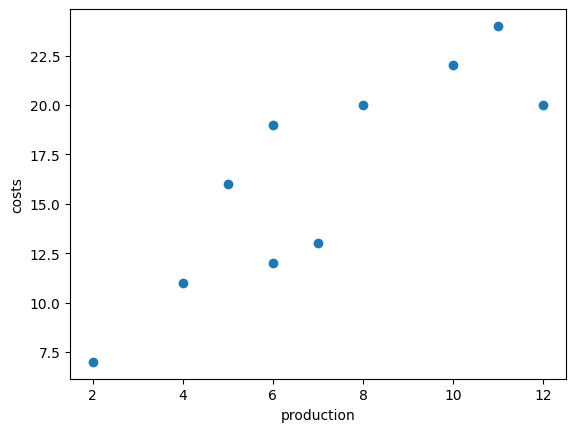

In [9]:
plt.figure()
plt.scatter(data[0], data[1])
plt.xlabel("production")
plt.ylabel("costs")
plt.savefig("lab7plot1.png", bbox_inches ="tight")
plt.show()

In [32]:
month=np.array([range(1,11)])

In [33]:
print(month)

[[ 1  2  3  4  5  6  7  8  9 10]]


In [34]:
data=np.append(data,month,axis=0)
print(data)

[[ 2  4  6  6 10  8  5  7 11 12]
 [ 7 11 12 19 22 20 16 13 24 20]
 [ 1  2  3  4  5  6  7  8  9 10]]


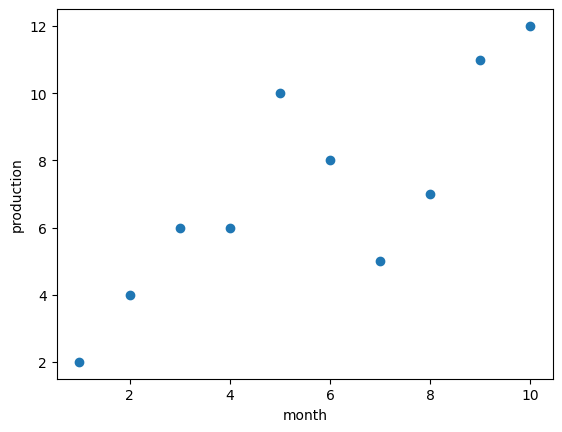

In [20]:
plt.figure()
plt.scatter(data[2], data[0])
plt.xlabel("month")
plt.ylabel("production")
plt.savefig("lab7plot2.png", bbox_inches ="tight")
plt.show()

In [35]:
data=np.transpose(data)

In [36]:
print(data)

[[ 2  7  1]
 [ 4 11  2]
 [ 6 12  3]
 [ 6 19  4]
 [10 22  5]
 [ 8 20  6]
 [ 5 16  7]
 [ 7 13  8]
 [11 24  9]
 [12 20 10]]


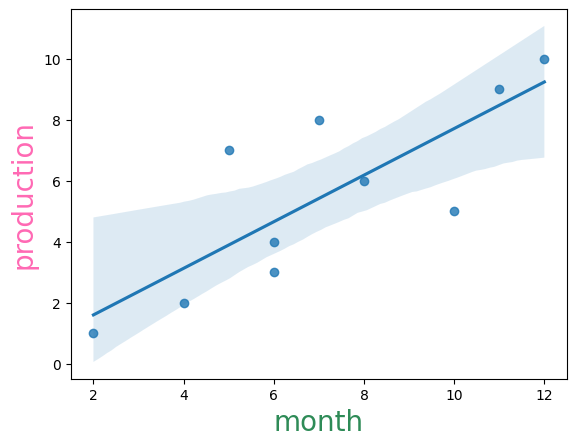

In [53]:
sb.regplot(x=data[:, 0], y=data[:, 2])
plt.xlabel("month",fontsize=20,color="seagreen")
plt.ylabel("production",fontsize=20,color="hotpink")
plt.savefig("lab7plot3.png", bbox_inches ="tight")
plt.show()

Solution to exercise 2

In [55]:
import pandas as pd
movie_data=pd.read_csv("imdb_top_1000_movies.csv",encoding='latin-1')

In [56]:
print(movie_data.head)

<bound method NDFrame.head of                         Title Released_Year Certificate  Runtime   Genre  \
0    The Shawshank Redemption          1994           A  142 min   Drama   
1               The Godfather          1972           A  175 min   Crime   
2             The Dark Knight          2008          UA  152 min  Action   
3      The Godfather: Part II          1974           A  202 min   Crime   
4                12 Angry Men          1957           U   96 min   Crime   
..                        ...           ...         ...      ...     ...   
995    Breakfast at Tiffany's          1961           A  115 min  Comedy   
996                     Giant          1956           G  201 min   Drama   
997     From Here to Eternity          1953      Passed  118 min   Drama   
998                  Lifeboat          1944         NaN   97 min   Drama   
999              The 39 Steps          1935         NaN   86 min   Crime   

     IMDB_Rating                                         

Solution to exercise 3

We need to remove part of the string to just leave the number of minutes for the runtime.

In [58]:
movie_data['Runtime'] = movie_data['Runtime'].str.replace(r'\D', '', regex=True).astype(int)

In [59]:
print(movie_data.head)

<bound method NDFrame.head of                         Title Released_Year Certificate  Runtime   Genre  \
0    The Shawshank Redemption          1994           A      142   Drama   
1               The Godfather          1972           A      175   Crime   
2             The Dark Knight          2008          UA      152  Action   
3      The Godfather: Part II          1974           A      202   Crime   
4                12 Angry Men          1957           U       96   Crime   
..                        ...           ...         ...      ...     ...   
995    Breakfast at Tiffany's          1961           A      115  Comedy   
996                     Giant          1956           G      201   Drama   
997     From Here to Eternity          1953      Passed      118   Drama   
998                  Lifeboat          1944         NaN       97   Drama   
999              The 39 Steps          1935         NaN       86   Crime   

     IMDB_Rating                                         

Now we group by the release year and find the mean of the runtimes for each year.

In [78]:
runtime_summary=movie_data.groupby('Released_Year', as_index=False)['Runtime'].mean()

In [79]:
print(runtime_summary)

   Released_Year     Runtime
0           1920   76.000000
1           1921   68.000000
2           1922   94.000000
3           1924   45.000000
4           1925   85.000000
..           ...         ...
95          2017  121.590909
96          2018  128.105263
97          2019  132.130435
98          2020  126.666667
99            PG  140.000000

[100 rows x 2 columns]


Covert to an array, from the print statement above, I am going to drop the final row and just ensure all the data is numerical before we plot.

In [80]:
runtime_summary=np.array(runtime_summary)
runtime_summary = np.delete(runtime_summary, 99, 0) 
runtime_summary = runtime_summary.astype(int)

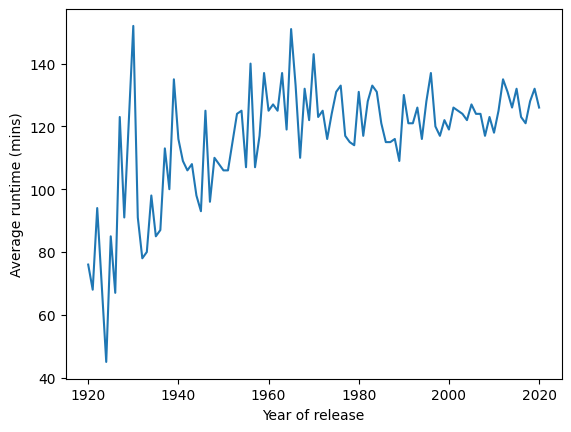

In [83]:
plt.figure()
plt.plot(runtime_summary[:,0],runtime_summary[:,1])
plt.xlabel("Year of release")
plt.ylabel("Average runtime (mins)")
plt.show()